In [1]:
#%% libraries
import pandas as pd
import matplotlib.pyplot as plt
#%% data

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
covid_df = pd.read_csv(url, index_col=0)

In [2]:
#%% viz 1
'''
Create a visualization that shows all of the counties in Utah as a time series,
similar to the one shown in slide 22 during the lecture.
'''

'\nCreate a visualization that shows all of the counties in Utah as a time series,\nsimilar to the one shown in slide 22 during the lecture.\n'

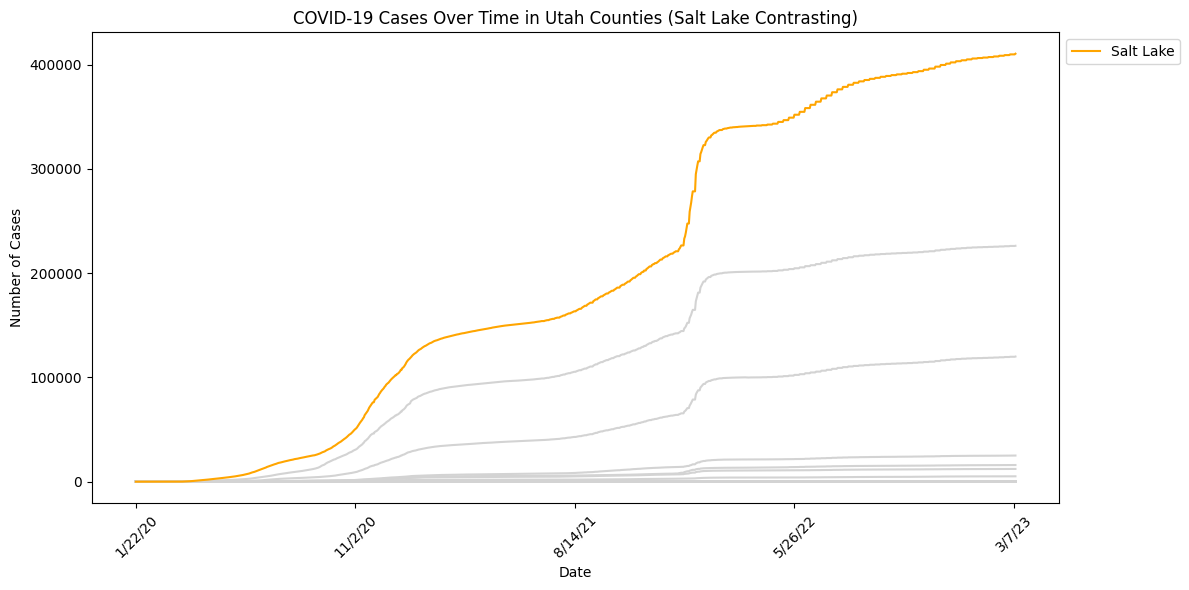

In [3]:
# Extracting data for Utah counties
utah_counties = ['Beaver', 'Box Elder', 'Cache', 'Carbon', 'Daggett', 'Davis', 'Duchesne', 'Emery', 'Garfield', 'Grand', 'Iron', 'Juab', 'Kane', 'Millard', 'Morgan', 'Piute', 'Rich', 'Salt Lake', 'San Juan', 'Sanpete', 'Sevier', 'Summit', 'Tooele', 'Uintah', 'Utah', 'Wasatch', 'Washington', 'Wayne', 'Weber']
utah_covid_df = covid_df[covid_df['Province_State'] == 'Utah']
utah_covid_df = utah_covid_df[utah_covid_df['Admin2'].isin(utah_counties)]

# Selecting a single county for contrasting color
contrasting_county = 'Salt Lake'

# Creating the visualization
plt.figure(figsize=(12, 6))

# Plotting all counties in a background color (grey)
for county in utah_counties:
    if county != contrasting_county:
        plt.plot(utah_covid_df.columns[10:], utah_covid_df[utah_covid_df['Admin2'] == county].iloc[:, 10:].values.flatten(), color='lightgrey', label='_nolegend_')

# Plotting a single county in a contrasting color
plt.plot(utah_covid_df.columns[10:], utah_covid_df[utah_covid_df['Admin2'] == contrasting_county].iloc[:, 10:].values.flatten(), color='orange', label=contrasting_county)

# Adding labels and title
plt.title(f'COVID-19 Cases Over Time in Utah Counties ({contrasting_county} Contrasting)')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Selecting and labeling only 5 ticks on the x-axis
tick_positions = range(0, len(utah_covid_df.columns[10:]), len(utah_covid_df.columns[10:]) // 4)
plt.xticks(tick_positions, utah_covid_df.columns[10:][::len(utah_covid_df.columns[10:]) // 4], rotation=45)

# Adding legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Displaying the plot
plt.tight_layout()
plt.show()

In [4]:
#%% viz 2
'''
Create a visualization that shows the contrast between the county in Utah with
the most cases to date to a county in Florida with the most cases to date.
The graphic should:
-Have only two counties plotted
-Highlight the difference between the two comparison counties
You may use any style of graphic you like as long as it is effective (dense)
and readable
'''


'\nCreate a visualization that shows the contrast between the county in Utah with\nthe most cases to date to a county in Florida with the most cases to date.\nThe graphic should:\n-Have only two counties plotted\n-Highlight the difference between the two comparison counties\nYou may use any style of graphic you like as long as it is effective (dense)\nand readable\n'

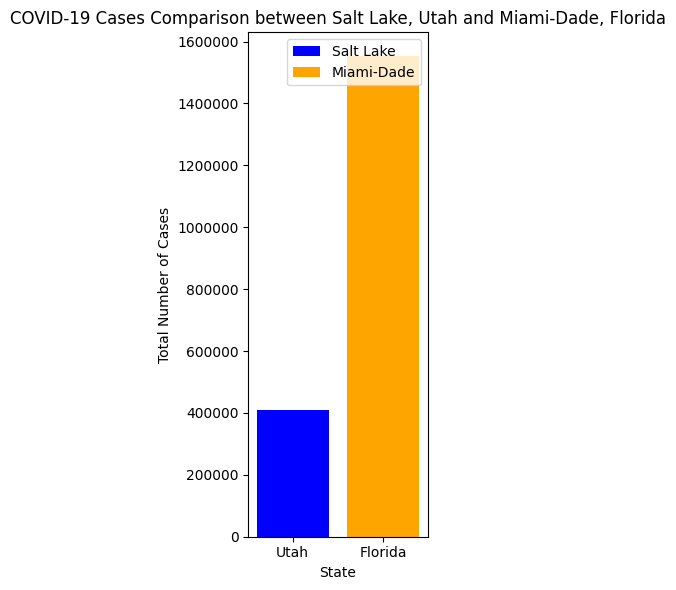

In [5]:
# Extracting data for Florida counties
florida_covid_df = covid_df[covid_df['Province_State'] == 'Florida']

# Finding the county in Utah with the most cases
max_cases_county_utah = utah_covid_df.groupby('Admin2').sum().iloc[:, 10:].max(axis=1).idxmax()

# Finding the county in Florida with the most cases
max_cases_county_florida = florida_covid_df.groupby('Admin2').sum().iloc[:, 10:].max(axis=1).idxmax()

# Creating the visualization
plt.figure(figsize=(3, 6))

# Plotting the county in Utah with the most cases
plt.bar('Utah', utah_covid_df[utah_covid_df['Admin2'] == max_cases_county_utah].iloc[:, 10:].sum().values, color='blue', label=max_cases_county_utah)

# Plotting the county in Florida with the most cases
plt.bar('Florida', florida_covid_df[florida_covid_df['Admin2'] == max_cases_county_florida].iloc[:, 10:].sum().values, color='orange', label=max_cases_county_florida)

# Adding labels and title
plt.title(f'COVID-19 Cases Comparison between {max_cases_county_utah}, Utah and {max_cases_county_florida}, Florida')
plt.xlabel('State')
plt.ylabel('Total Number of Cases')

# Adding legend
plt.legend()

# Formatting y-axis ticks to display full numbers
plt.ticklabel_format(style='plain', axis='y')

# Displaying the plot
plt.tight_layout()
plt.show()


In [6]:

#%% viz 3
'''
Create a visualization that shows BOTH the running total of cases for a single
county AND the daily new cases. The graphic should:
-Use two y-axes (https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html)
-Use color to contrast the two series being plotted
-Have well formatted dates as the X axis
'''

'\nCreate a visualization that shows BOTH the running total of cases for a single\ncounty AND the daily new cases. The graphic should:\n-Use two y-axes (https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html)\n-Use color to contrast the two series being plotted\n-Have well formatted dates as the X axis\n'

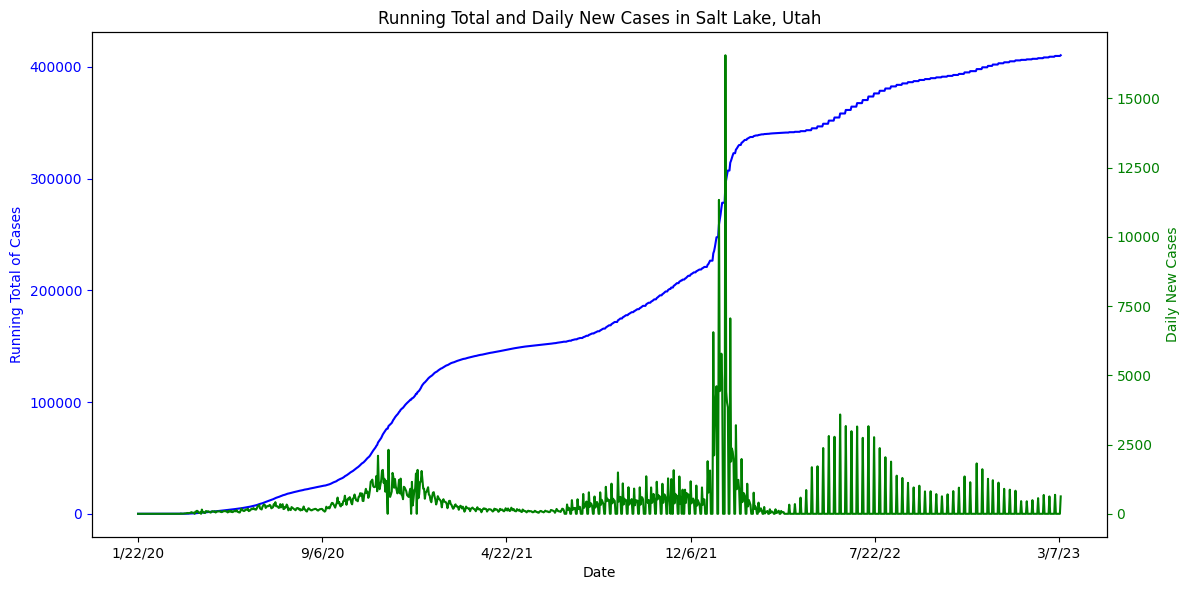

In [7]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Reading the data from the provided URL
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
covid_df = pd.read_csv(url, index_col=0)

# Extracting data for a specific county 
selected_county = 'Salt Lake'
county_data = covid_df[(covid_df['Province_State'] == 'Utah') & (covid_df['Admin2'] == selected_county)].iloc[:, 10:]

# Calculating daily new cases using shift() method
daily_new_cases = county_data - county_data.shift(1, axis=1)
daily_new_cases.iloc[:, 0] = county_data.iloc[:, 0]  # Set the first day's new cases to the same as total cases

# Creating the visualization with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting the running total of cases on the left y-axis
ax1.plot(county_data.columns, county_data.values.flatten(), color='blue', label='Running Total')
ax1.set_xlabel('Date')
ax1.set_ylabel('Running Total of Cases', color='blue')
ax1.tick_params('y', colors='blue')

# Creating a second y-axis (right) for daily new cases
ax2 = ax1.twinx()
ax2.plot(daily_new_cases.columns, daily_new_cases.values.flatten(), color='green', label='Daily New Cases')
ax2.set_ylabel('Daily New Cases', color='green')
ax2.tick_params('y', colors='green')

# Adding well-formatted dates on the X-axis
plt.xticks(county_data.columns[::len(county_data.columns) // 5], rotation=45)

# Adding title and legend
plt.title(f'Running Total and Daily New Cases in {selected_county}, Utah')
fig.tight_layout()
plt.show()


In [8]:
#%% viz 4
'''
Create a visualization that shows a stacked bar chart of county contributions
to a given state's total cases. You may choose any state (or states).
(https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html#sphx-glr-gallery-lines-bars-and-markers-bar-stacked-py)
The graphic should:
-Have a single column delineate a state
-Have each 'slice' or column compontent represent a county
'''

"\nCreate a visualization that shows a stacked bar chart of county contributions\nto a given state's total cases. You may choose any state (or states).\n(https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html#sphx-glr-gallery-lines-bars-and-markers-bar-stacked-py)\nThe graphic should:\n-Have a single column delineate a state\n-Have each 'slice' or column compontent represent a county\n"

<Figure size 200x300 with 0 Axes>

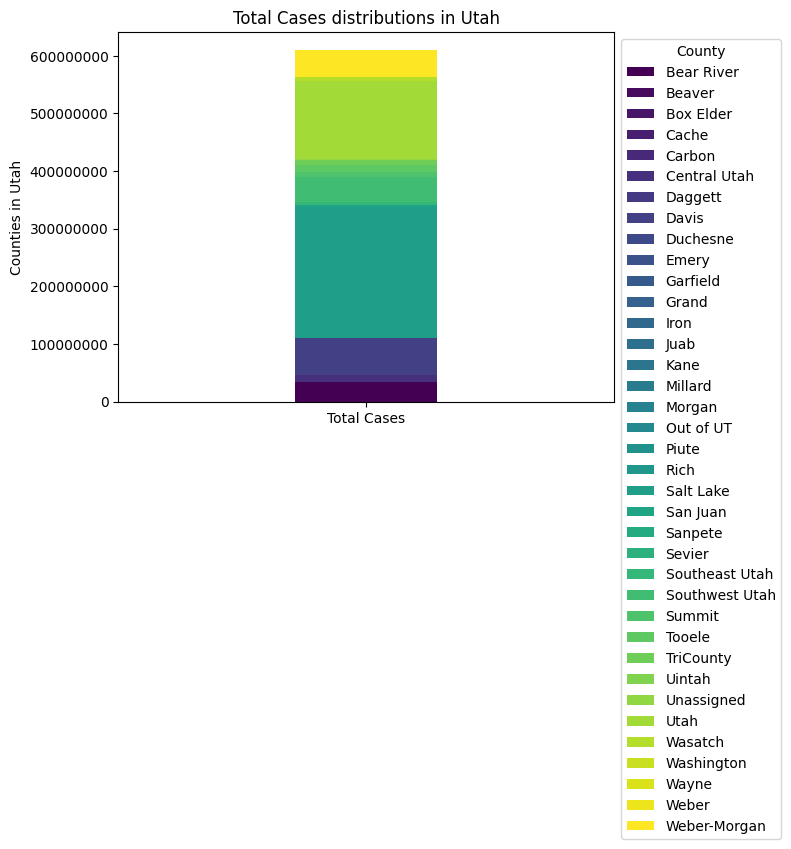

In [9]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
covid_df = pd.read_csv(url, index_col=0)

# Filter data for Utah
utah_data = covid_df[covid_df['Province_State'] == 'Utah']

# Extract relevant columns (date columns and county names)
date_columns = utah_data.columns[11:]
county_columns = utah_data['Admin2']


# Calculate total cases for each county in Utah
county_total_cases = utah_data.groupby('Admin2')[date_columns].sum().sum(axis=1)

# Create a DataFrame with total cases for each county
total_cases_df = pd.DataFrame({'Total Cases': county_total_cases.values}, index=county_total_cases.index)

# Transpose the DataFrame to have one row and each column representing one county
total_cases_df_transposed = total_cases_df.transpose()

# Plot a stacked bar chart
plt.figure(figsize=(2, 3))
total_cases_df_transposed.plot(kind='bar', stacked=True, colormap='viridis', width=0.2)

# Formatting y-axis ticks to display full numbers
plt.ticklabel_format(style='plain', axis='y')


# Customize the chart
plt.title('Total Cases distributions in Utah')
plt.ylabel('Counties in Utah')
plt.xticks(rotation = 0)
plt.legend(title='County', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()
